# Some examples of Seaborn visualizations 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Initialize random data

In [2]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

1. Plot data with Matplotlib defaults

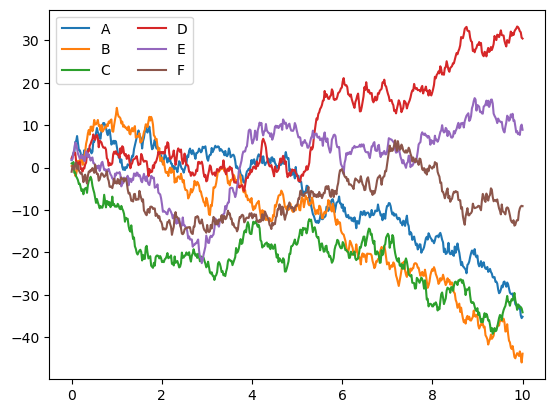

In [3]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

2. Plot same data with Seaborn

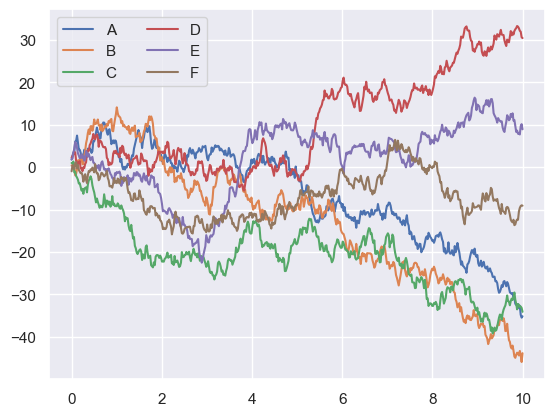

In [4]:
sns.set()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Exploring Seaborn Plots

### Histograms, KDE, and densities

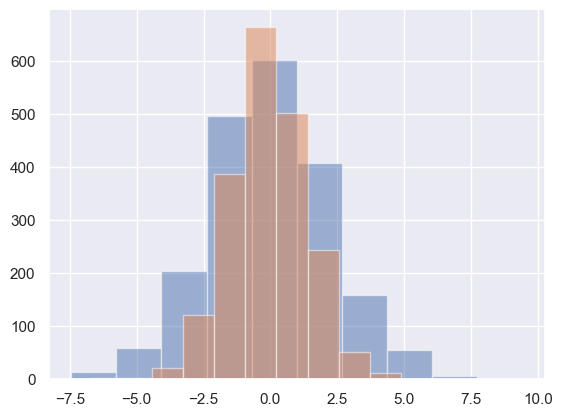

In [5]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

Smooth estimate of the distribution using a kernel density estimation (sns.kdeplot)

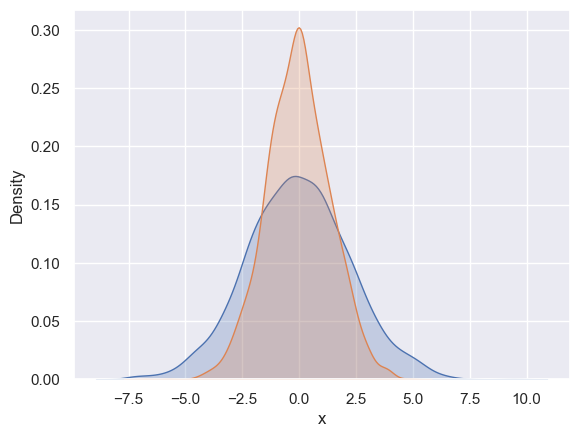

In [6]:
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

Combining Histograms and KDE using distplot

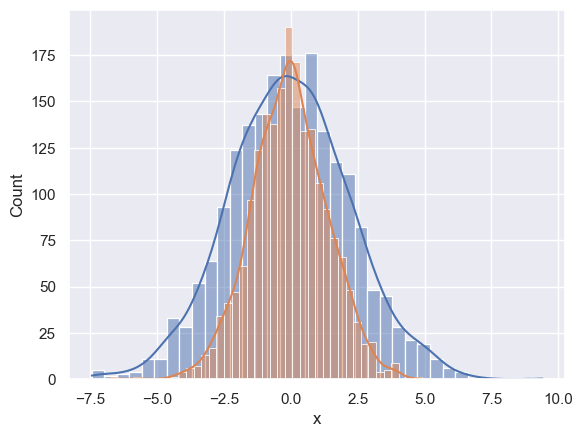

In [7]:
sns.histplot(data['x'], kde=True)
sns.histplot(data['y'], kde=True);

### Pair plots

Pair plots are a useful tool for exploring correlations between multidimensional data by plotting all pairs of values against each other. Essentially, when joint plots are generalized to datasets of larger dimensions, they become pair plots.

In [8]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


sns.pairplot visualization

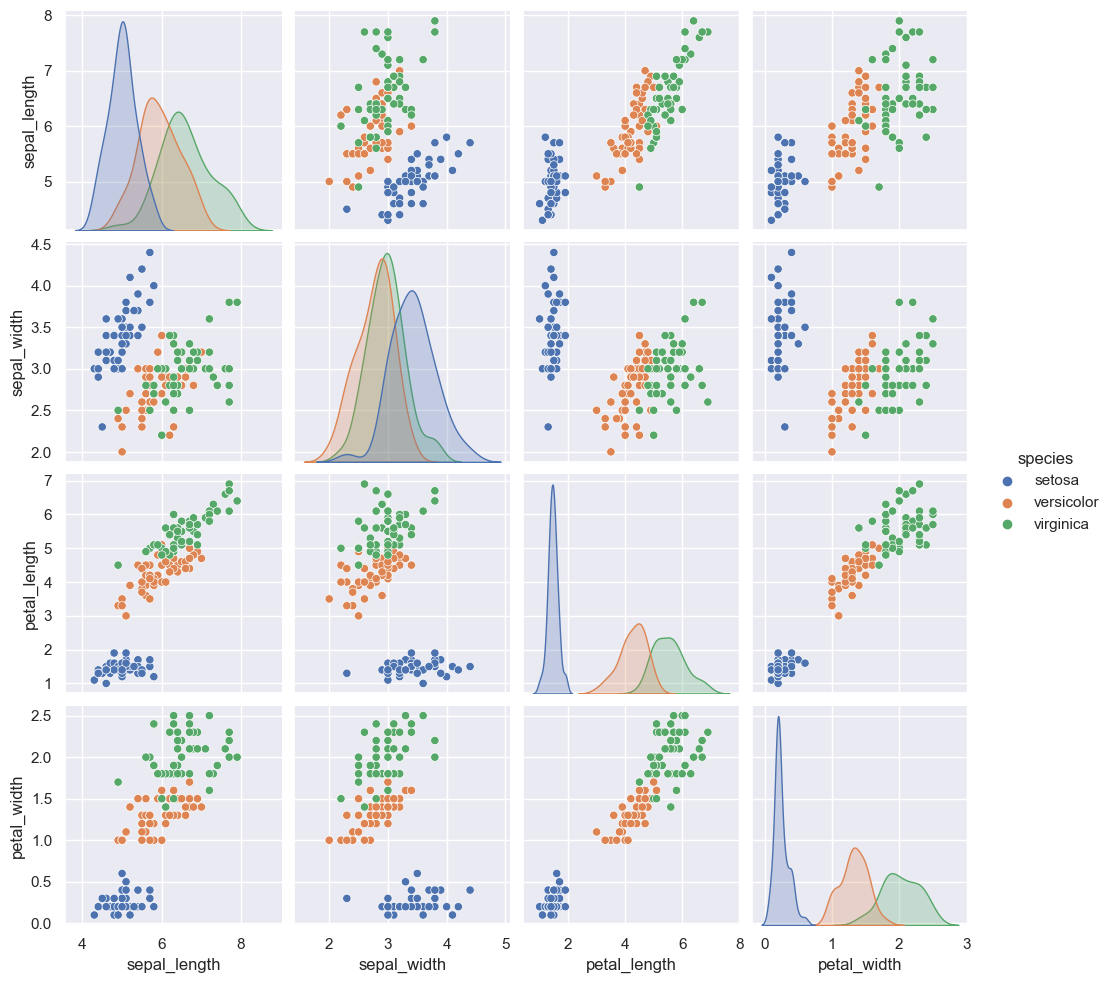

In [9]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms

In [10]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


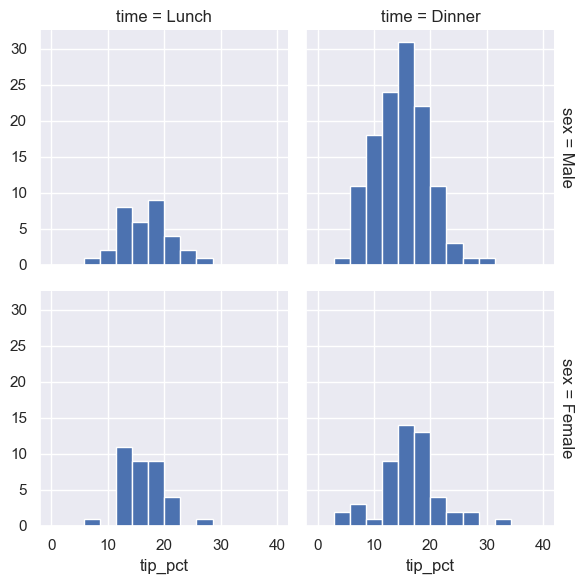

In [11]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Bar Plots

In [12]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


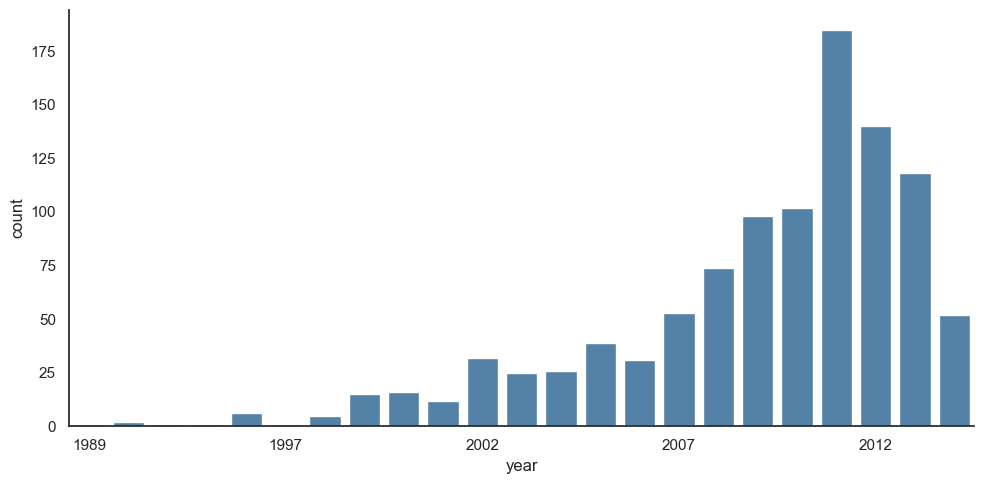

In [28]:
with sns.axes_style('white'):
    g = sns.catplot(data=planets, x="year", aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

More options:

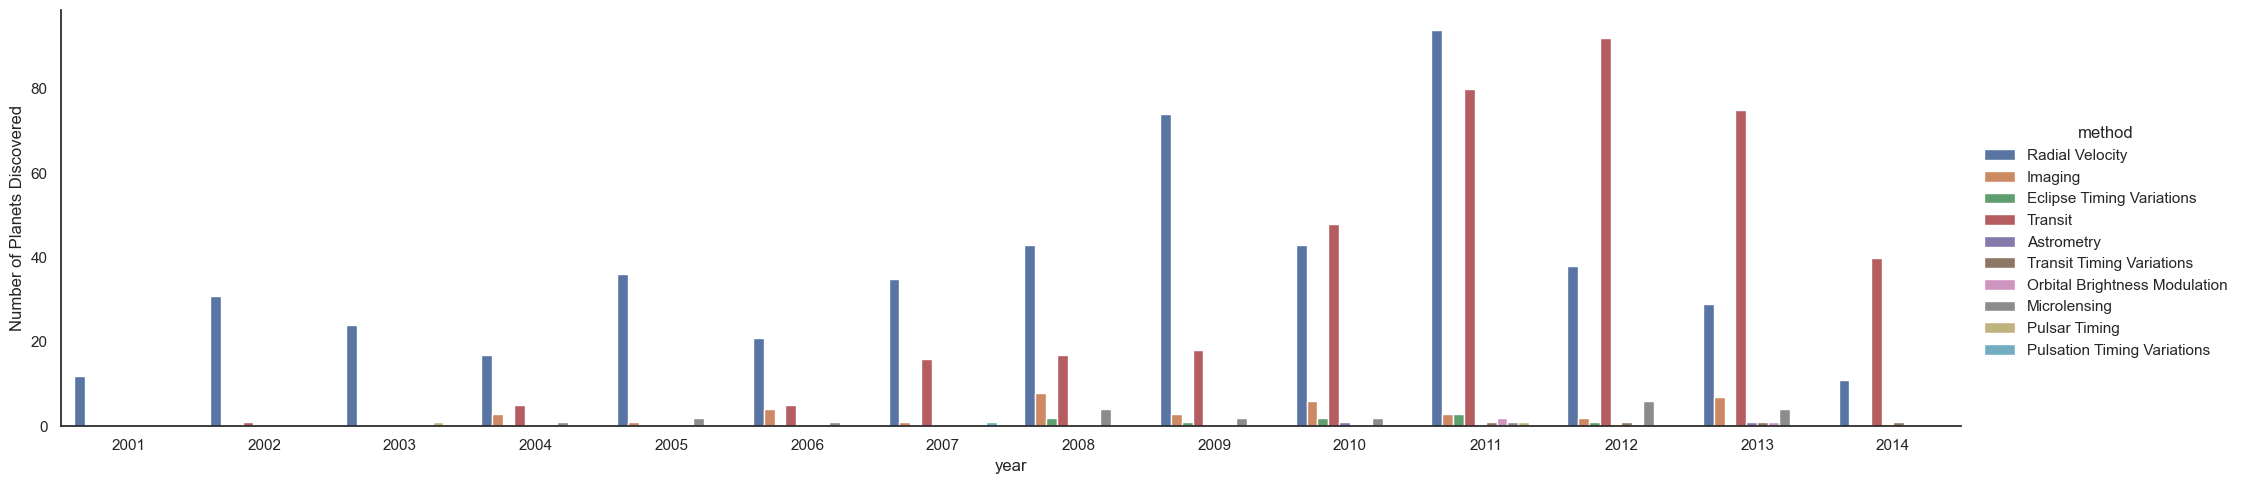

In [29]:
with sns.axes_style('white'):
    g = sns.catplot(data=planets, x='year', aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

Simple graphic bar:

In [14]:
titanic = sns.load_dataset("titanic")

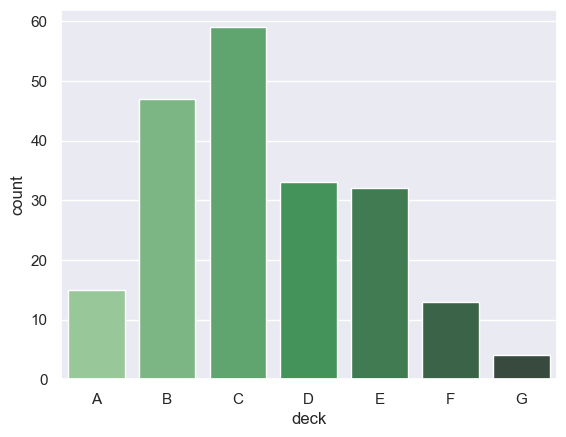

In [15]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");